<table style="width: 100%;"> <tr> <td style="width: 20%; vertical-align: top;"> <img src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" alt="UdeA" height="150px"> </td> <td style="width: 80%; padding-left: 20px;"> <strong style="font-size: 30px;">ANALÍSIS ESTADISTICO EN LA GESTIÓN DE LA CADENA DE ABASTECIMIENTO-MODULO ALMACENAMIENTO</strong><br><br> <span style="font-size: 30px;"> Valentina Jiménez Torres <br> Juan Camilo Henao Caro<br> David Guillermo Diaz Rodriguez <br> Fernando Antonio Piñeres Ramos </span> </td> </tr> </table>

#LIBRERÍAS REQUERIDAS


---



In [77]:
#Conexión de Google Cola con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LECTURA DEL CONJUNTO DE DATOS

In [79]:
datos = pd.read_excel('/content/drive/MyDrive/cod/CA_inventarios/data/bd_caso.xlsx', sheet_name=["Inventario inicial", "Salidas", "Entradas", "Maestro de materiales"])

In [80]:
#Separación de cada hoja del libro de excel.

libro_excel = datos.copy()

df_inventario_inicial = libro_excel["Inventario inicial"] # DataFrame de la hoja Inventario inicial
df_salidas = libro_excel["Salidas"] # DataFrame de la hoja Salidas
df_entradas = libro_excel["Entradas"] # DataFrame de la hoja Entradas
df_maestro_materiales = libro_excel["Maestro de materiales"] # DataFrame de la hoja Maestro de materiales.

# EXPLORACIÓN DE LOS DATOS

---

In [81]:
#Visualización de los datos contenidos en la hoja de Inventario inicial
display(df_inventario_inicial.head())

,SKU,Inventario Inicial (Cajas)
0,13569,3
1,13970,574
2,13980,2380
3,17070,74
4,17090,150




```
# SKU: El número/código de referencia asignado a un elemento para identificarlo en el inventario físico o financiero.
```

```
# Inventario Inicial (Cajas): Cantidad de cajas disponibles de cada referencia.
```



In [82]:
#Visualización de los datos contenidos en la hoja Salidas.
display(df_salidas.head())

,Transporte,Pedido,Entrega,Destinat.,Material,CANT,Dia,Hora,Cajas por Pallet
0,30113428,13515,92389141,13515,18375,100.0,2012-11-26,07:00:00,33
1,30113428,13515,92389141,13515,20176,5.0,2012-11-26,07:00:00,25
2,30113428,13515,92389141,13515,21250,6.0,2012-11-26,07:00:00,18
3,30113428,13515,92389141,13515,21261,60.0,2012-11-26,07:00:00,28
4,30113428,13515,92389141,13515,31002,2.0,2012-11-26,07:00:00,80


In [83]:
#Visualización de los datos contenidos en la hoja Entradas
display(df_entradas.head())

,Material,Cajas,Documento de recibo,Fecha,Hora
0,20176,30.0,41239,2012-11-21,09:00:00
1,34259,6.0,41239,2012-11-21,09:00:00
2,34377,1.0,41239,2012-11-21,09:00:00
3,43564,3.0,41239,2012-11-21,09:00:00
4,71101,266.0,41239,2012-11-21,09:00:00


In [84]:
#Visualización de los datos contenidos en la hoja maestro de materiales
display(df_maestro_materiales.head())

,Material,Cajas por Pallet,Categoría,m3 por caja,Valor de la mercancía por caja,Kg por caja,Tamaño/Dimensión
0,13569,55,CARNES Y CARNES FRIAS,"0,047 M3",194444,"7,050 KG",600X400X196
1,13970,44,BEBIDAS NO ALCOHOLICAS,"0,049 M3",128660,"6,090 KG",500X500X196
2,13980,66,"GALLETERIA, CONFITERIA Y CHOCOLATES","0,039 M3",151408,"4,560 KG",510X390X196
3,17070,240,PANADERIA INDUSTRIAL,"0,008 M3",298914,"2,120 KG",295X195X140
4,17090,180,COSMETICOS,"0,011 M3",161853,"2,850 KG",350X190X140




```
# Base de datos central donde se almacenan datos clave de cada material, como su descripción, características, precios, unidades de medida, etc.
```



In [85]:
#Resumen de los datos del libro Inventario Inicial
df_inventario_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   SKU                         464 non-null    int64
 1   Inventario Inicial (Cajas)  464 non-null    int64
dtypes: int64(2)
memory usage: 7.4 KB




```
# No tiene valores nulos, dos columnas con valores tipo entero y 464 registros.
```



In [86]:
#Resumen de los datos del libro Entradas
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14909 entries, 0 to 14908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Material             14909 non-null  int64         
 1   Cajas                14909 non-null  float64       
 2   Documento de recibo  14909 non-null  int64         
 3   Fecha                14909 non-null  datetime64[ns]
 4   Hora                 14909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 582.5+ KB


```
# No tiene valores nulos, 4 columnas con 2 variables tipo entero, 1 tipo flotate, 1 tipo fecha y horas y 1 categórica. 14908 registros.
```

In [87]:
#Resumen de los datos del libro Salidas
df_salidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77562 entries, 0 to 77561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transporte        77562 non-null  int64         
 1   Pedido            77562 non-null  int64         
 2   Entrega           77562 non-null  int64         
 3   Destinat.         77562 non-null  int64         
 4   Material          77562 non-null  int64         
 5   CANT              77562 non-null  float64       
 6   Dia               77562 non-null  datetime64[ns]
 7   Hora              77562 non-null  object        
 8   Cajas por Pallet  77562 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 5.3+ MB


```
# No tiene valores nulos, 6 columnas con variables tipo entero, 1 tipo flotate y 1 categórica. 77561 registros.
```

In [88]:
#Resumen de los datos del libro Maestro de materiales
df_maestro_materiales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Material                        464 non-null    int64 
 1   Cajas por Pallet                464 non-null    int64 
 2   Categoría                       464 non-null    object
 3   m3 por caja                     464 non-null    object
 4   Valor de la mercancía por caja  464 non-null    int64 
 5   Kg por caja                     464 non-null    object
 6   Tamaño/Dimensión                464 non-null    object
dtypes: int64(3), object(4)
memory usage: 25.5+ KB


```
# No tiene valores nulos, 3 columnas con variables tipo entero  y 4 categóricas. 463 registros.
```

In [89]:
print("La tabla Inventario incial tiene " ,df_inventario_inicial.duplicated().sum(), " registros duplicados.")
print("La tabla Entradas tiene " ,df_entradas.duplicated().sum(), " registros duplicados.")
print("La tabla Salidas tiene " ,df_salidas.duplicated().sum(), " registros duplicados.")
print("La tabla Maestro de materiales tiene " ,df_maestro_materiales.duplicated().sum(), " registros duplicados.")

La tabla Inventario incial tiene  0  registros duplicados.
La tabla Entradas tiene  0  registros duplicados.
La tabla Salidas tiene  260  registros duplicados.
La tabla Maestro de materiales tiene  0  registros duplicados.


#TRANSFORMACIONES DEL CONJUNTO DE DATOS



```
# Las tablas se pueden relacionar con el número de material o referencia para realizar consultas.

Debemos asegurar que el nombre de la columna sea el mismo.
```



In [90]:
#Se modifica el nombre de la columnas llamadas Material por SKU
df_maestro_materiales.rename(columns={'Material': 'SKU'}, inplace=True)
df_salidas.rename(columns={'Material': 'SKU'}, inplace=True)
df_entradas.rename(columns={'Material': 'SKU'}, inplace=True)

In [91]:
# De la tabla Maestro de materiales, se retira la palabra KG y se convierte la varible a tipo decimal.
df_maestro_materiales['Kg por caja'] = df_maestro_materiales['Kg por caja'].str.replace(' KG', '').str.replace(',', '.').astype(float)

# SOLUCIÓN A LAS PREGUNTAS


---






```
# 1. ¿Cuántas Referencias se tienen en almacenamiento?

se necesita contar la cantidad de SKUs únicos
SKU (Stock Keeping Unit) es el código de identificación único de cada producto o variante de producto dentro de un sistema de gestión de almacén
```



In [26]:
#Cantida de SKUs únicos almacenados
numero_referencias = len(df_inventario_inicial['SKU'].unique())
print(f'En total existen {numero_referencias} referencias unicas en almacenamiento.')


En total existen 464 referencias unicas en almacenamiento.




```
# Contar con 464 referencias indica la oferta de productos es amplia, mayor cobertura de las necesidades del cliente.

- Muchos SKUs requieren de más espacio y organización.
- La mayoría rotan o existe sobreoferta de los productos o serviicos?
- Muchos SKUs requiere de más picking(preparación de pedidos), más errores y exige más control del inventario.

```



```
# 2. ¿Cuántas Referencias se reciben y se despachan?

```

In [27]:
#Cantidad de referencias únicas que han ingresado.
referencias_recibidas = len(df_entradas['SKU'].unique())
print(f'La cantidad de referencias únicas que han estado ingresando son en total {referencias_recibidas}.')
print()

#Cantidad de referencias únicas que has salido.
referencias_despachadas = len(df_salidas['SKU'].unique())
print(f'La cantidad de referencias únicas que ha estado saliendo son en total {referencias_despachadas}.')


La cantidad de referencias únicas que han estado ingresando son en total 464.

La cantidad de referencias únicas que ha estado saliendo son en total 464.




```
# Tener la misma cantidad cantidad de SKUs en almacenamiento, entrada y salida es bueno:
 - Indica que no hay cambio de referencias frecuente.
 - Todos los productos están rotando.
 - Los niveles de inventario parece que se están administrando de forma eficiente.
 - Su analisis ayuda a evaluar fluctuaciones del mercado y dar repuesta adecuada a la demanda.
```





```
# 3. ¿Cuál es el ABC de los producto por rotación? Total por CEDI y categoría.

Clasifica los productos en A, B y C, siendo A los de mayor rotación y C los de menor.
clasifica los productos según su frecuencia de venta.
```



In [28]:
# Supongamos que 'Cantidad' es la columna con unidades movidas
rotacion = df_salidas.groupby('SKU')['CANT'].sum().sort_values(ascending=False)
rotacion_total = rotacion.sum()
rotacion_pct = rotacion / rotacion_total * 100
rotacion_df = rotacion_pct.reset_index()
rotacion_df['acumulado'] = rotacion_df['CANT'].cumsum()

# Asignar clases ABC
def clasificar(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

rotacion_df['Clase_ABC'] = rotacion_df['acumulado'].apply(clasificar)

In [29]:
import pandas as pd

rotacion = df_salidas.groupby('SKU')['CANT'].sum().sort_values(ascending=False)

# Calcular porcentaje y acumulado
rotacion_total = rotacion.sum()
rotacion_pct = rotacion / rotacion_total * 100

# Crear el DataFrame
rotacion_df = pd.DataFrame({
    'CANT': rotacion,
    'Porcentaje': rotacion_pct,
})

rotacion_df['Acumulado'] = rotacion_df['Porcentaje'].cumsum()

# Clasificación ABC
def clasificar(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

rotacion_df['Clase_ABC'] = rotacion_df['Acumulado'].apply(clasificar)

# Reiniciar el índice si quieres que 'Material' sea columna
rotacion_df = rotacion_df.reset_index()

# Mostrar ejemplo
display(rotacion_df.head(30))

,SKU,CANT,Porcentaje,Acumulado,Clase_ABC
0,18331,264267.0,11.450255,11.450255,A
1,18128,224460.0,9.725483,21.175738,A
2,18043,179083.0,7.759372,28.935110,A
3,71152,111444.0,4.828685,33.763795,A
4,49001,75718.0,3.280736,37.044532,A
5,18139,69113.0,2.994553,40.039084,A
6,20186,58932.0,2.553427,42.592511,A
7,97766,48104.0,2.084267,44.676778,A
8,40284,42614.0,1.846395,46.523173,A
9,18461,41824.0,1.812165,48.335338,A


In [30]:
conteo_referencias = rotacion_df['Clase_ABC'].value_counts().sort_index()

porcentaje_referencias = (conteo_referencias / conteo_referencias.sum()) * 100

porcentaje_ventas = rotacion_df.groupby('Clase_ABC')['CANT'].sum() / rotacion_total * 100

resumen_abc = pd.DataFrame({
    'Cantidad_referencias': conteo_referencias,
    'Porcentaje_referencias': porcentaje_referencias,
    'Porcentaje_ventas': porcentaje_ventas
}).reset_index().rename(columns={'index': 'Clase_ABC'})

# Mostrar el resumen
display(resumen_abc)


,Clase_ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_ventas
0,A,46,9.913793,79.757842
1,B,94,20.258621,15.185306
2,C,324,69.827586,5.056852


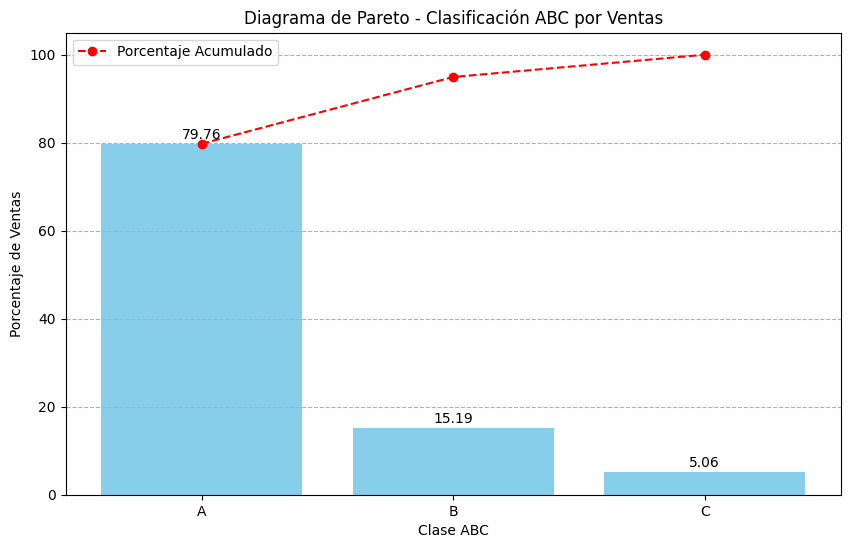

In [31]:

import matplotlib.pyplot as plt
import pandas as pd

data = {'Clase_ABC': ['A', 'B', 'C'],
        'Cantidad_referencias': [46, 94, 324],
        'Porcentaje_referencias': [9.91, 20.26, 69.83],
        'Porcentaje_ventas': [79.76, 15.19, 5.06]}
df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))

# Gráfico de barras
bars = plt.bar(df['Clase_ABC'], df['Porcentaje_ventas'], color='skyblue')
plt.xlabel("Clase ABC")
plt.ylabel("Porcentaje de Ventas")
plt.title("Diagrama de Pareto - Clasificación ABC por Ventas")


cumulative_percentage = df['Porcentaje_ventas'].cumsum()
plt.plot(df['Clase_ABC'], cumulative_percentage, color='red', marker='o', linestyle='--', label='Porcentaje Acumulado')

for bar, value in zip(bars, df['Porcentaje_ventas']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(value, 2), ha='center', va='bottom')

plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


La clasificación ABC muestra que el 9,91% de las referencias (clase A) generan el 79,76% de las ventas, lo que indica que una pequeña parte del portafolio aporta la mayor rentabilidad, siendo clave para el negocio. La clase B representa el 20,26% de las referencias y contribuye con un 15,19% de las ventas, lo que sugiere una importancia intermedia y posible potencial de crecimiento. Por otro lado, la clase C agrupa el 69,83% de las referencias pero solo genera el 5,06% de las ventas, lo que evidencia un bajo rendimiento comercial. Este análisis permite enfocar los esfuerzos de control, inversión y planeación de inventarios principalmente en los productos de clase A, mientras se evalúa la rentabilidad y necesidad de mantener las referencias B y C.

In [32]:
#Se suma el total de salidas
df_salidas['CANT'] = df_salidas['CANT'].astype(int)
total_cajas = df_salidas['CANT'].sum()
print(total_cajas)

2307957


In [33]:
#Se debe agrupar todos los CANT de cada SKU y hacer la suma y frecuencia acumulada
df_rotacion = df_salidas[['SKU', 'CANT']].groupby('SKU', as_index=False)['CANT'].sum().sort_values(by='CANT', ascending=False).copy()
df_rotacion['Suma Acumulada'] = df_rotacion['CANT'].cumsum() #Crear fila de suma acumulada
df_rotacion['Porcentaje Acumulado'] = (df_rotacion['Suma Acumulada'] / total_cajas) * 100 #Crear fila de porcentaje acumulado

In [34]:
# Filtrar los SKUs que conforman el 80% del inventario total para la clase A
rotacion_A = df_rotacion[df_rotacion['Porcentaje Acumulado'] <= 80]
# Mostrar los resultados
print(f'✅ Número de SKUs que representan el 80% del inventario y que son tipo A: {len(rotacion_A)}')
print('\n SKUs que conforman el 80%:')
print(rotacion_A['SKU'])

✅ Número de SKUs que representan el 80% del inventario y que son tipo A: 46

 SKUs que conforman el 80%:
15     18331
8      18128
5      18043
291    71152
264    49001
9      18139
39     20186
418    97766
137    40284
25     18461
23     18444
414    97750
13     18244
6      18053
341    74011
21     18375
24     18451
16     18352
31     18556
265    49100
297    72302
18     18361
34     20072
12     18233
410    97715
355    80080
33     18571
403    97016
290    71121
163    43416
28     18535
43     20643
74     31639
334    73601
71     31373
69     31299
267    49114
275    62233
416    97764
146    41599
70     31369
52     21261
419    97768
284    70260
266    49113
67     31297
Name: SKU, dtype: int64


In [35]:
# Filtrar los SKUs que conforman el 80%-95% del inventario para la clase B
rotacion_B = df_rotacion[(df_rotacion['Porcentaje Acumulado'] > 80) & (df_rotacion['Porcentaje Acumulado'] <= 95)]
print(f'✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: {len(rotacion_B)}')
print('\n SKUs que conforman el 80%-95%:')
print(rotacion_B['SKU'])

✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: 94

 SKUs que conforman el 80%-95%:
408    97711
417    97765
289    71111
11     18210
420    97769
       ...  
353    76151
279    62493
244    47301
180    43571
376    83150
Name: SKU, Length: 94, dtype: int64


In [36]:
# Filtrar los SKUs que conforman el 95%-100% del inventario para la clase C
rotacion_C = df_rotacion[(df_rotacion['Porcentaje Acumulado'] > 95) & (df_rotacion['Porcentaje Acumulado'] <= 100)]
print(f'\n✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: {len(rotacion_C)}')
print('\n SKUs que conforman el 95%-100%:')
print(rotacion_C['SKU'])


✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: 324

 SKUs que conforman el 95%-100%:
127    34250
330    73465
431    97842
373    83020
407    97708
       ...  
320    72924
393    95150
282    62670
390    95015
29     18550
Name: SKU, Length: 324, dtype: int64


## ABC de popularidad (segun Pedido)

In [37]:
popularidad = df_salidas['SKU'].value_counts().reset_index()
popularidad.columns = ['SKU', 'Frecuencia']

popularidad['Porcentaje'] = 100 * popularidad['Frecuencia'] / popularidad['Frecuencia'].sum()
popularidad['Porcentaje Acumulado'] = popularidad['Porcentaje'].cumsum()


def clasificar_pop(p):
    if p <= 80:
        return 'A'
    elif p <= 95:
        return 'B'
    else:
        return 'C'

popularidad['Clase ABC'] = popularidad['Porcentaje Acumulado'].apply(clasificar_pop)

# Paso 4: Unir con maestro para agregar categoría u otros datos si deseas
abc_popularidad = popularidad.merge(df_maestro_materiales[['SKU', 'Categoría']], on ="SKU")

# Mostrar resultado
abc_popularidad.head(30)

,SKU,Frecuencia,Porcentaje,Porcentaje Acumulado,Clase ABC,Categoría
0,18128,1605,2.069312,2.069312,A,TEXTILES
1,18043,1469,1.893969,3.963281,A,PANADERIA INDUSTRIAL
2,97766,1380,1.779222,5.742503,A,"GALLETERIA, CONFITERIA Y CHOCOLATES"
3,20186,1361,1.754725,7.497228,A,"GALLETERIA, CONFITERIA Y CHOCOLATES"
4,49001,1345,1.734097,9.231325,A,PAPELES Y DESECHABLES
5,97750,1239,1.597432,10.828756,A,PAPELES Y DESECHABLES
6,18053,1223,1.576803,12.405559,A,PANADERIA INDUSTRIAL
7,40284,1216,1.567778,13.973337,A,FRUVER
8,20072,1195,1.540703,15.514040,A,CARNES Y CARNES FRIAS
9,71152,1179,1.520074,17.034115,A,CARNES Y CARNES FRIAS


Los primeros ocho SKUs de clase A representan un 13,97% acumulado de la frecuencia total de ventas, lo cual evidencia que estos productos tienen una alta rotación y son ampliamente preferidos por los consumidores. La categoría más destacada es Galletería, Confitería y Chocolates, con dos SKUs dentro del top 4, seguida por Panadería Industrial, Papeles y Desechables, Textiles y Fruver, cada una con al menos un SKU en el listado. Esta distribución indica una popularidad transversal en productos tanto de indulgencia como de necesidad básica y uso cotidiano. Para una estrategia eficiente, estos SKUs deben ser priorizados en abastecimiento, promociones y espacio en el punto de venta, ya que su alta rotación puede impactar directamente en la satisfacción del cliente y en el desempeño comercial general.

In [38]:

categorias = abc_popularidad['Categoría'].unique()


for categoria in categorias:
    df_categoria = abc_popularidad[abc_popularidad['Categoría'] == categoria]

    resumen = df_categoria.groupby('Clase ABC').agg(
        Cantidad_referencias=('SKU', 'count'),
        Porcentaje_referencias=('SKU', lambda x: 100 * len(x) / len(df_categoria)),
        Porcentaje_popularidad=('Frecuencia', lambda x: 100 * x.sum() / df_categoria['Frecuencia'].sum())
    ).reset_index()

    print(f"Resumen ABC para la categoría: {categoria}")
    display(resumen)
    print("\n" + "-"*60 + "\n")

Resumen ABC para la categoría: TEXTILES


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,11,35.483871,88.618079
1,B,6,19.354839,6.755797
2,C,14,45.161290,4.626124



------------------------------------------------------------

Resumen ABC para la categoría: PANADERIA INDUSTRIAL


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,8,18.604651,80.492529
1,B,7,16.279070,12.313226
2,C,28,65.116279,7.194245



------------------------------------------------------------

Resumen ABC para la categoría: GALLETERIA, CONFITERIA Y CHOCOLATES


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,11,28.947368,83.501719
1,B,11,28.947368,13.769399
2,C,16,42.105263,2.728882



------------------------------------------------------------

Resumen ABC para la categoría: PAPELES Y DESECHABLES


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,11,26.829268,82.842753
1,B,10,24.390244,14.370453
2,C,20,48.780488,2.786794



------------------------------------------------------------

Resumen ABC para la categoría: FRUVER


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,12,33.333333,83.026475
1,B,11,30.555556,14.500739
2,C,13,36.111111,2.472786



------------------------------------------------------------

Resumen ABC para la categoría: CARNES Y CARNES FRIAS


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,10,24.390244,86.582781
1,B,7,17.073171,9.245033
2,C,24,58.536585,4.172185



------------------------------------------------------------

Resumen ABC para la categoría: VARIEDADES


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,9,21.951220,80.022868
1,B,8,19.512195,14.652074
2,C,24,58.536585,5.325057



------------------------------------------------------------

Resumen ABC para la categoría: ASEO PERSONAL Y LIMPIEZA


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,8,20.512821,76.429468
1,B,10,25.641026,19.053594
2,C,21,53.846154,4.516939



------------------------------------------------------------

Resumen ABC para la categoría: COSMETICOS


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,7,17.5,71.411192
1,B,9,22.5,21.390916
2,C,24,60.0,7.197891



------------------------------------------------------------

Resumen ABC para la categoría: BEBIDAS NO ALCOHOLICAS


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,7,17.073171,78.810555
1,B,5,12.195122,12.898779
2,C,29,70.731707,8.290666



------------------------------------------------------------

Resumen ABC para la categoría: GRANOS Y VIVERES


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,6,17.142857,59.421081
1,B,11,31.428571,32.140907
2,C,18,51.428571,8.438012



------------------------------------------------------------

Resumen ABC para la categoría: FARMACIA


,Clase ABC,Cantidad_referencias,Porcentaje_referencias,Porcentaje_popularidad
0,A,5,13.157895,55.667337
1,B,11,28.947368,33.836351
2,C,22,57.894737,10.496311



------------------------------------------------------------



In [39]:
#Calcular cuantos pedidos unicos estan asociados a cada SKU y ordenarlos de mayor a menor
df_salidas['SKU'] = df_salidas['SKU'].astype(str)
df_popularidad = df_salidas.groupby('SKU')['Pedido'].nunique().reset_index()
df_popularidad.rename(columns={'Pedido': 'Pedidos'}, inplace=True)
df_popularidad = df_popularidad.sort_values(by='Pedidos', ascending=False).copy()

In [40]:
total_pedidos = df_popularidad['Pedidos'].sum()

In [41]:
#Calcular la suma acumulada y el porcentaje acumulado
df_popularidad['Suma Acumulada'] = df_popularidad['Pedidos'].cumsum()
df_popularidad['Porcentaje Acumulado'] = (df_popularidad['Suma Acumulada'] / total_pedidos) * 100
df_popularidad

,SKU,Pedidos,Suma Acumulada,Porcentaje Acumulado
137,40284,101,101,0.905830
291,71152,100,201,1.802691
12,18233,100,301,2.699552
8,18128,100,401,3.596413
163,43416,99,500,4.484305
...,...,...,...,...
423,97800,1,11146,99.964126
426,97807,1,11147,99.973094
427,97830,1,11148,99.982063
19,18371,1,11149,99.991031


In [42]:
# Filtrar los SKUs que conforman el 80% para la clase A
popularidad_A = df_popularidad[df_popularidad['Porcentaje Acumulado'] <= 80]
# Mostrar los resultados
print(f'✅ Número de SKUs que representan el 80% del inventario y que son tipo A: {len(popularidad_A)}')
print('\n SKUs que conforman el 80%:')
print(popularidad_A['SKU'])

✅ Número de SKUs que representan el 80% del inventario y que son tipo A: 149

 SKUs que conforman el 80%:
137    40284
291    71152
12     18233
8      18128
163    43416
       ...  
165    43514
145    41577
223    47060
288    71101
287    71100
Name: SKU, Length: 149, dtype: object


In [43]:
# Filtrar los SKUs que conforman el 80%-95% para la clase B
popularidad_B = df_popularidad[(df_popularidad['Porcentaje Acumulado'] > 80) & (df_popularidad['Porcentaje Acumulado'] <= 95)]
print(f'✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: {len(popularidad_B)}')
print('\n SKUs que conforman el 80%-95%:')
print(popularidad_B['SKU'])

✅ Número de SKUs que representan el 80%-95% del inventario y que son tipo B: 104

 SKUs que conforman el 80%-95%:
68     31298
166    43517
420    97769
85     31883
286    71052
       ...  
461    98883
247    47308
356    80091
366    80540
56     23067
Name: SKU, Length: 104, dtype: object


In [44]:
# Filtrar los SKUs que conforman el 95%-100% para la clase C
popularidad_C = df_popularidad[(df_popularidad['Porcentaje Acumulado'] > 95) & (df_popularidad['Porcentaje Acumulado'] <= 100)]
print(f'\n✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: {len(popularidad_C)}')
print('\n SKUs que conforman el 95%-100%:')
print(popularidad_C['SKU'])


✅ Número de SKUs que representan el 95%-100% del inventario y que son tipo C: 211

 SKUs que conforman el 95%-100%:
379    83433
75     31643
26     18530
91     31926
86     31910
       ...  
423    97800
426    97807
427    97830
19     18371
0      13569
Name: SKU, Length: 211, dtype: object


## ¿Cuántos pallets almacenados tengo por categoria y total CEDI?

In [45]:
inventario = df_inventario_inicial.rename(columns={
    'Inventario Inicial (Cajas)': 'Cajas',
})

inventario_categoria = inventario.merge(df_maestro_materiales[['SKU', 'Categoría', 'Cajas por Pallet']], on="SKU", how='left')

inventario_categoria['Pallets'] = inventario_categoria['Cajas'] / inventario_categoria['Cajas por Pallet']

pallets_categoria = inventario_categoria.groupby('Categoría')['Pallets'].sum().reset_index()

pallets_categoria.loc['TOTAL'] = ['TOTAL', pallets_categoria['Pallets'].sum()]

pallets_categoria


,Categoría,Pallets
0,ASEO PERSONAL Y LIMPIEZA,434.657510
1,BEBIDAS NO ALCOHOLICAS,383.503654
2,CARNES Y CARNES FRIAS,1490.758231
3,COSMETICOS,545.594417
4,FARMACIA,352.404325
5,FRUVER,956.840748
6,"GALLETERIA, CONFITERIA Y CHOCOLATES",2250.922128
7,GRANOS Y VIVERES,174.838337
8,PANADERIA INDUSTRIAL,2293.175589
9,PAPELES Y DESECHABLES,3010.975992


Las categorías que más espacio ocupan en almacenamiento son Papeles y Desechables, Textiles, Panadería Industrial y Galletería, sumando más del 65% del total de pallets. Esto sugiere alta demanda o baja rotación. En contraste, categorías como Granos y Víveres o Aseo Personal ocupan menos espacio, lo que podría indicar mayor rotación o menor volumen por unidad. Este patrón ayuda a priorizar el control de inventario y la planificación del espacio logístico.

## ¿Cuántos dias en inventario tengo por categoria y total CEDI?

In [47]:
# Asegurar que las categorías sean del mismo tipo
disponibles_categoria['Categoría'] = disponibles_categoria['Categoría'].astype(str)
ventas_3_meses['Categoría'] = ventas_3_meses['Categoría'].astype(str)

# Quitar fila TOTAL si existe para evitar problemas al unir
disponibles_sin_total = disponibles_categoria[disponibles_categoria['Categoría'] != 'TOTAL']
ventas_sin_total = ventas_3_meses[ventas_3_meses['Categoría'] != 'TOTAL']

# Unir ambas tablas por 'Categoría'
disponibles_completo = pd.merge(
    disponibles_sin_total,
    ventas_sin_total[['Categoría', 'Ventas por mes']],
    on='Categoría',
    how='left'
)

# Calcular columna de Días en Inventario
disponibles_completo['Días en inventario'] = (disponibles_completo['Cajas'] / disponibles_completo['Ventas por mes']) * 30

# Manejo de posibles valores nulos o infinitos
disponibles_completo['Días en inventario'] = disponibles_completo['Días en inventario'].replace([float('inf'), -float('inf')], 0)
disponibles_completo['Días en inventario'] = disponibles_completo['Días en inventario'].fillna(0)


# Calcular totales
fila_total = pd.DataFrame({
    'Categoría': ['TOTAL'],
    'Cajas': [disponibles_completo['Cajas'].sum()],
    'Ventas por mes': [disponibles_completo['Ventas por mes'].sum()],
    'Días en inventario': [disponibles_completo['Días en inventario'].mean()]  # puedes usar .mean() o .sum() si prefieres
})

# Agregar fila TOTAL
disponibles_completo = pd.concat([disponibles_completo, fila_total], ignore_index=True)

# Mostrar resultado
disponibles_completo


NameError: name 'disponibles_categoria' is not defined

In [48]:
# Asegurar que 'SKU' sea tipo string en ambos DataFrames
df_salidas['SKU'] = df_salidas['SKU'].astype(str)
df_maestro_materiales['SKU'] = df_maestro_materiales['SKU'].astype(str)

# Hacer el merge
merged_df = pd.merge(df_salidas, df_maestro_materiales, on='SKU', how='left')

# Agrupar por categoría y sumar CANT
ventas_3_meses = merged_df.groupby('Categoría')['CANT'].sum().reset_index()
ventas_3_meses.rename(columns={'CANT': 'Ventas por 3 meses'}, inplace=True)

# Calcular ventas promedio por mes dividiendo entre 3
ventas_3_meses['Ventas por mes'] = ventas_3_meses['Ventas por 3 meses'] / 3

# Agregar fila TOTAL
total_row = pd.DataFrame({
    'Categoría': ['TOTAL'],
    'Ventas por 3 meses': [ventas_3_meses['Ventas por 3 meses'].sum()],
    'Ventas por mes': [ventas_3_meses['Ventas por mes'].sum()]
})

# Concatenar
ventas_3_meses = pd.concat([ventas_3_meses, total_row], ignore_index=True)

# Mostrar resultado
ventas_3_meses


,Categoría,Ventas por 3 meses,Ventas por mes
0,ASEO PERSONAL Y LIMPIEZA,89391,29797.000000
1,BEBIDAS NO ALCOHOLICAS,67163,22387.666667
2,CARNES Y CARNES FRIAS,245093,81697.666667
3,COSMETICOS,82950,27650.000000
4,FARMACIA,57376,19125.333333
5,FRUVER,147579,49193.000000
6,"GALLETERIA, CONFITERIA Y CHOCOLATES",304726,101575.333333
7,GRANOS Y VIVERES,40044,13348.000000
8,PANADERIA INDUSTRIAL,309522,103174.000000
9,PAPELES Y DESECHABLES,479190,159730.000000


## ¿Cuántos camiones se reciben durante el día?

In [49]:
# Contar cuántos documentos de recibo únicos hay por cada fecha
df_recibidos_por_dia = df_entradas.groupby('Fecha')['Documento de recibo'].nunique().reset_index()
df_recibidos_por_dia.columns = ['Fecha', 'Camiones Recibidos']
df_recibidos_por_dia

,Fecha,Camiones Recibidos
0,2012-11-21,20
1,2012-11-22,20
2,2012-11-23,20
3,2012-11-24,20
4,2012-11-25,20
...,...,...
71,2013-02-14,20
72,2013-02-15,20
73,2013-02-16,20
74,2013-02-17,20


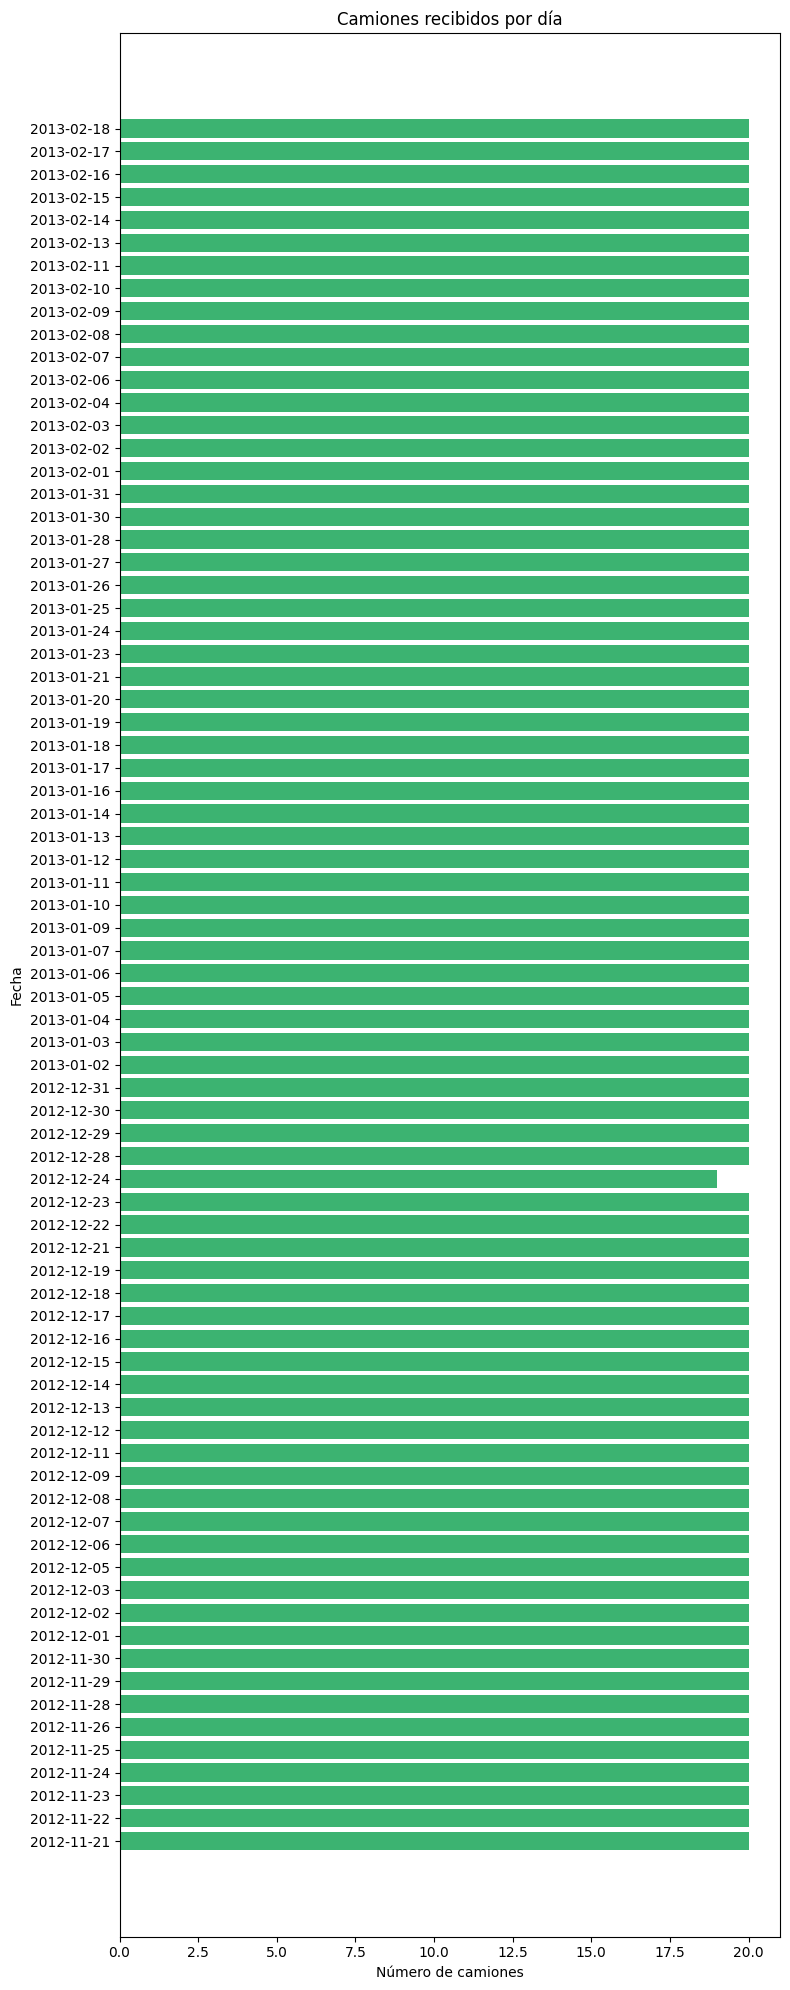

In [50]:
plt.figure(figsize=(8, 20))
plt.barh(df_recibidos_por_dia['Fecha'].astype(str), df_recibidos_por_dia['Camiones Recibidos'], color='mediumseagreen')
plt.title('Camiones recibidos por día')
plt.xlabel('Número de camiones')
plt.ylabel('Fecha')
plt.tight_layout()
plt.show()

## ¿Cuántos camiones se reciben en cada turno de trabajo?

Asumiendo que los turnos son:

* 6AM a 2PM
* 2PM a 8PM
* 8PM a 6AM

In [51]:
# Convertir la columna Hora a formato datetime.time
df_entradas['Hora'] = pd.to_datetime(df_entradas['Hora'], format='%H:%M:%S')

In [52]:
# Contar camiones por turno
recibidos_turno1 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 6) &
    (df_entradas['Hora'].dt.hour < 14)]['Documento de recibo'].nunique()

recibidos_turno2 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 14) &
    (df_entradas['Hora'].dt.hour < 20)]['Documento de recibo'].nunique()

recibidos_turno3 = df_entradas[
    (df_entradas['Hora'].dt.hour >= 20) &
    (df_entradas['Hora'].dt.hour <= 6)]['Documento de recibo'].nunique()

# Crear la tabla
df_turnos_recibidos = pd.DataFrame({
    'Turno': ['Turno 6 AM - 2 PM', 'Turno 2 PM - 8 PM', 'Turno 8 PM - 6 AM'],
    'Camiones Recibidos': [recibidos_turno1, recibidos_turno2, recibidos_turno3 ]})

# Mostrar la tablita
df_turnos_recibidos

,Turno,Camiones Recibidos
0,Turno 6 AM - 2 PM,778
1,Turno 2 PM - 8 PM,640
2,Turno 8 PM - 6 AM,0


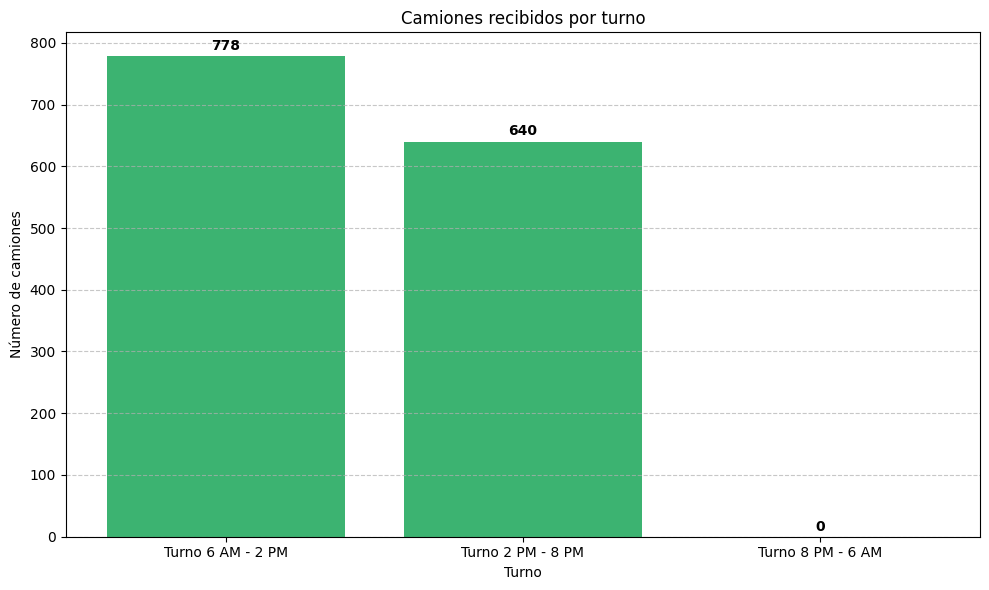

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(df_turnos_recibidos['Turno'].astype(str), df_turnos_recibidos['Camiones Recibidos'], color='mediumseagreen')
plt.title('Camiones recibidos por turno')
plt.xlabel('Turno')
plt.ylabel('Número de camiones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, v in enumerate(df_turnos_recibidos['Camiones Recibidos']):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## ¿Cuál es el volumen promedio de los vehículos que se reciben?

In [61]:
# Asegurarse de que la columna 'Fecha' sea tipo datetime
df_entradas['Fecha'] = pd.to_datetime(df_entradas['Fecha'])

# Merge como ya hicimos
df_entradas['SKU'] = df_entradas['SKU'].astype(str)
df_maestro_materiales['SKU'] = df_maestro_materiales['SKU'].astype(str)
df_maestro_materiales['m3 por caja'] = df_maestro_materiales['m3 por caja'].astype(str)
df_maestro_materiales['m3 por caja'] = (
    df_maestro_materiales['m3 por caja']
    .str.replace(' M3', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Hacer merge
merged_df = pd.merge(df_entradas, df_maestro_materiales, on='SKU', how='left')

# Calcular volumen por entrada
merged_df['Volumen'] = merged_df['Cajas'] * merged_df['m3 por caja']

# Agrupar por fecha y documento de recibo (camión) para contar camiones únicos por día
camiones_por_dia = merged_df[['Fecha', 'Documento de recibo']].drop_duplicates()
camiones_por_dia = camiones_por_dia.groupby('Fecha').count().rename(columns={'Documento de recibo': 'Cantidad_camiones'})

# Volumen total por día
volumen_por_dia = merged_df.groupby('Fecha')['Volumen'].sum().to_frame(name='Volumen_total')

# Unir los dos resultados en un solo DataFrame
resumen_diario = camiones_por_dia.join(volumen_por_dia)

# Calcular el volumen promedio por camión en cada día
resumen_diario['Volumen_promedio_por_camion'] = resumen_diario['Volumen_total'] / resumen_diario['Cantidad_camiones']

# Mostrar resultado
print(resumen_diario)

            Cantidad_camiones  Volumen_total  Volumen_promedio_por_camion
Fecha                                                                    
2012-11-21                 20        870.500                     43.52500
2012-11-22                 20       1728.321                     86.41605
2012-11-23                 20       1078.481                     53.92405
2012-11-24                 20       1524.337                     76.21685
2012-11-25                 20       1633.169                     81.65845
...                       ...            ...                          ...
2013-02-14                 20       2644.059                    132.20295
2013-02-15                 20       2344.711                    117.23555
2013-02-16                 20       2413.383                    120.66915
2013-02-17                 20       1189.180                     59.45900
2013-02-18                 20        603.292                     30.16460

[76 rows x 3 columns]


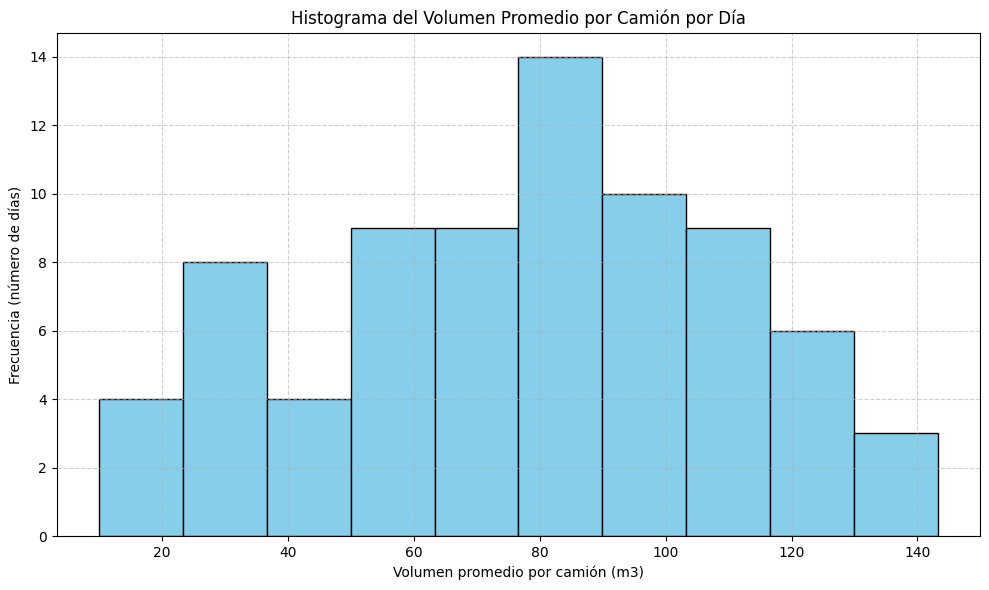

In [62]:
import matplotlib.pyplot as plt

# Histograma del volumen promedio por camión por día
plt.figure(figsize=(10, 6))
plt.hist(resumen_diario['Volumen_promedio_por_camion'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histograma del Volumen Promedio por Camión por Día')
plt.xlabel('Volumen promedio por camión (m3)')
plt.ylabel('Frecuencia (número de días)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

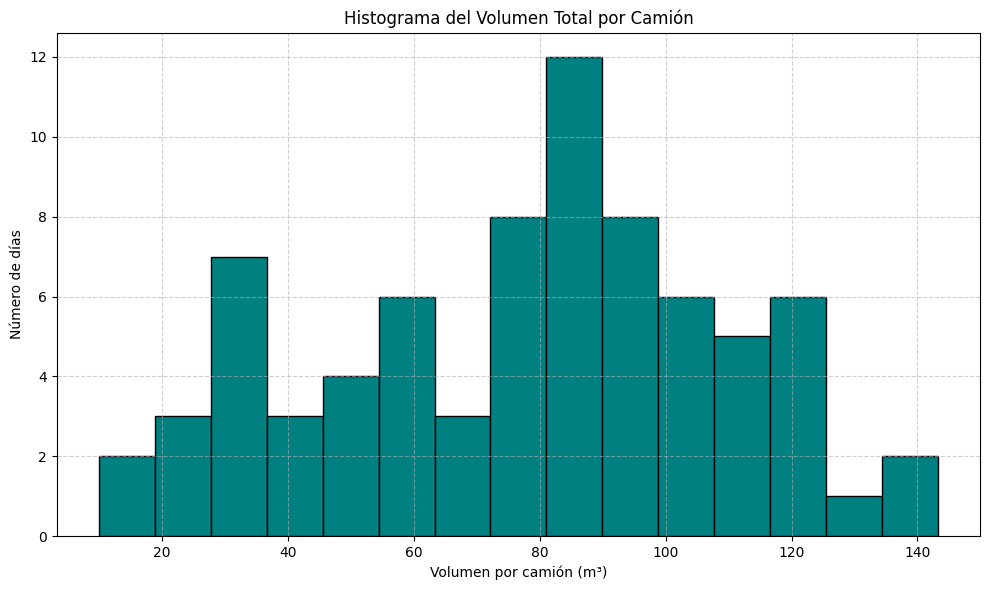

In [63]:
import matplotlib.pyplot as plt

# Histograma del volumen total por camión (calculado por día)
plt.figure(figsize=(10, 6))
plt.hist(resumen_diario['Volumen_promedio_por_camion'], bins=15, color='teal', edgecolor='black')
plt.title('Histograma del Volumen Total por Camión')
plt.xlabel('Volumen por camión (m³)')
plt.ylabel('Número de días')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular el volumen total de cajas por camión
volumen_por_camion = df_entradas.groupby('Documento de recibo')['Cajas'].sum()
volumen_por_camion

In [ ]:
#Calcular el volumen promedio
volumen_promedio = volumen_por_camion.mean()
print(f"\n El volumen promedio de los vehículos que se reciben es: {volumen_promedio:.2f} cajas por camión.")

## ¿Cuál es el volumen promedio de los vehículos que se despachan?

In [ ]:
# Calcular el volumen total de cajas por camión
volumen_por_camion_s = df_salidas.groupby('Transporte')['CANT'].sum()
volumen_por_camion_s

In [ ]:
#Calcular el volumen promedio
volumen_promedio_s = volumen_por_camion_s.mean()
print(f"\n El volumen promedio de los vehículos que se reciben es: {volumen_promedio_s:.2f} cajas por camión.")

In [72]:
import pandas as pd

# Asegurar que las columnas clave estén en el tipo correcto
df_salidas['SKU'] = df_salidas['SKU'].astype(str)
df_maestro_materiales['SKU'] = df_maestro_materiales['SKU'].astype(str)

# Asegurarse de que 'm3 por caja' está en formato numérico
if df_maestro_materiales['m3 por caja'].dtype == object:
    df_maestro_materiales['m3 por caja'] = (
        df_maestro_materiales['m3 por caja']
        .str.replace(' M3', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

# Hacer merge para tener los m3 por caja en df_salidas
df_salidas = df_salidas.merge(
    df_maestro_materiales[['SKU', 'm3 por caja']],
    left_on='SKU', right_on='SKU', how='left'
)

# Calcular volumen de cada fila
df_salidas['Volumen'] = df_salidas['CANT'] * df_salidas['m3 por caja']

# Agrupar por vehículo (Transporte) para obtener volumen total por camión
volumen_por_transporte = df_salidas.groupby('Transporte')['Volumen'].sum()

# Calcular el volumen promedio de los vehículos despachados
volumen_promedio_despacho = volumen_por_transporte.mean()

print(f"El volumen promedio de los vehículos que se despachan es: {volumen_promedio_despacho:.2f} m³")

MergeError: Passing 'suffixes' which cause duplicate columns {'m3 por caja_x'} is not allowed.

## ¿Cuántos camiones se despacahan cada día?

In [ ]:
# Contar cuántos Transportes únicos hay por cada dia
df_despachados_por_dia = df_salidas.groupby('Dia')['Transporte'].nunique().reset_index()
df_despachados_por_dia.columns = ['Dia', 'Camiones Despachados']
df_despachados_por_dia

In [ ]:
plt.figure(figsize=(8, 20))
bars = plt.barh(df_despachados_por_dia['Dia'].astype(str), df_despachados_por_dia['Camiones Despachados'], color='mediumseagreen')

# Agregar los valores a la derecha de cada barra
for bar in bars:
    plt.text(
        bar.get_width(),  # Posición en el eje X
        bar.get_y() + bar.get_height() / 2,  # Posición en el eje Y (centro de la barra)
        str(bar.get_width()),  # El valor de la barra
        va='center',  # Alineación vertical (centrado)
        ha='left',  # Alineación horizontal (a la izquierda)
        color='black')  # Color del texto

plt.title('Camiones despachados por día')
plt.xlabel('Número de camiones')
plt.ylabel('Fecha')

plt.tight_layout()
plt.show()

## ¿Cuántos camiones se despachan cada turno de trabajo?

In [ ]:
# Convertir la columna Hora a formato datetime.time
df_salidas['Hora'] = pd.to_datetime(df_salidas['Hora'], format='%H:%M:%S')

In [ ]:
# Contar camiones por turno
despachados_turno1 = df_salidas[
    (df_salidas['Hora'].dt.hour >= 6) &
    (df_salidas['Hora'].dt.hour < 14)]['Transporte'].nunique()

despachados_turno2 = df_salidas[
    (df_salidas['Hora'].dt.hour >= 14) &
    (df_salidas['Hora'].dt.hour <= 20)]['Transporte'].nunique()

despachados_turno3 = df_salidas[
    (df_salidas['Hora'].dt.hour > 20) |
    (df_salidas['Hora'].dt.hour < 6)]['Transporte'].nunique()

# Crear la tabla
df_turnos_despachados = pd.DataFrame({
    'Turno': ['Turno 6 AM - 2 PM', 'Turno 2 PM - 8 PM', 'Turno 8 PM - 6 AM'],
    'Camiones Despachados': [despachados_turno1, despachados_turno2, despachados_turno3]})

# Mostrar la tablita
df_turnos_despachados

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_turnos_despachados['Turno'].astype(str), df_turnos_despachados['Camiones Despachados'], color='mediumseagreen')
plt.title('Camiones despachados por turno')
plt.xlabel('Turno')
plt.ylabel('Número de camiones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for i, v in enumerate(df_turnos_despachados['Camiones Despachados']):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## ¿Cuántos pallets completos se despachan por horas?

In [ ]:

# calcular pallets despachados por fila
df_salidas['pallets_despachados'] = df_salidas['CANT'] / df_salidas['Cajas por Pallet']

# agrupar por la hora (Hora) y sumar
pallets_por_hora = df_salidas.groupby('Hora')['pallets_despachados'].sum().reset_index()

# extraer la hora como número entero
pallets_por_hora['Hora'] = pallets_por_hora['Hora'].apply(lambda x: f"{x.hour:02d}:00")

# redondear a un decimal la cantidad de pallets
pallets_por_hora['pallets_despachados'] = pallets_por_hora['pallets_despachados'].round(1)

# ver resultado
print(pallets_por_hora)



## ¿Cuántas cajas se tienen que despachar desde picking por hora?

In [ ]:
# revisar que la columna 'Hora' esté en formato datetime
df_salidas['Hora'] = pd.to_datetime(df_salidas['Hora'], format='%H:%M:%S')

# extraer la hora como número entero (0 a 23)
df_salidas['Hora_entera'] = df_salidas['Hora'].dt.hour

# se agrupa por hora del día y sumar las cajas despachadas
cajas_por_hora = df_salidas.groupby('Hora_entera')['CANT'].sum().reset_index()

# se verifica que todas las 24 horas estén representadas, incluso si no hubo despacho
todas_las_horas = pd.DataFrame({'Hora_entera': range(24)})
cajas_por_hora = todas_las_horas.merge(cajas_por_hora, on='Hora_entera', how='left')
cajas_por_hora['CANT'] = cajas_por_hora['CANT'].fillna(0)

# formatear hora para presentación
cajas_por_hora['Hora'] = cajas_por_hora['Hora_entera'].astype(str).str.zfill(2) + ":00"
cajas_por_hora = cajas_por_hora[['Hora', 'CANT']]


print("Cajas a despachar desde picking por cada hora del día:")
print(cajas_por_hora)

## ¿Cuál es el peso promedio de los pallets que están almacenando?

In [ ]:
# se calcula el peso por pallet
df_maestro_materiales['peso_por_pallet'] = df_maestro_materiales['Kg por caja'] * df_maestro_materiales['Cajas por Pallet']

# se calcula el peso promedio de los pallets
peso_promedio = df_maestro_materiales['peso_por_pallet'].mean()

print(f"Peso promedio de los pallets almacenados: {peso_promedio:.2f} kg")